<a href="https://colab.research.google.com/github/YingAnalytics/Yelp_review_analysis_Cleveland2019/blob/main/Yelp_review_analysis_Cleveland2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project: Yelp review text analysis : Cleveland Restaurants Yelp Review in 2019**<br>

<h6><center> Ying Zhang </center></h6>


#### Introduction ####

Yelp is a leading application in sharing restaurant information. It provides open data of a subset of the busineses listed on yelp, the corresponding ratings and reviews as well as user data in personal,educational and academic purposes.Through performing NLP analysis on the text reviews of the Cleveland resturants in the year of 2019, my goal is to provide actional insights for resturants to improve their overall customer satisfactions and their yelp review ratings. 

This notebook focuses on the NLP/text analysis of yelp texual reviews, and it consists of the following parts of analysis:
* Part1: Exploratory data analysis
* Part2: Word frequency and WordCloud analysis 
* Part3: Topic Modeling
* Part4: Sentiment Analysis 
* Part5: Key words Analysis
* Part6: Business Insights



## Imports

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/

%cd/gdrive/Shareddrives/MSBA Capstone Team/BA820_team_project/Dataset

Mounted at /gdrive
/gdrive
/gdrive/Shareddrives/MSBA Capstone Team/BA820_team_project/Dataset


In [ ]:
! pip install scikit-plot
! pip install emoji
! pip install newspaper3k
! pip install nltk
! pip install newspaper3k
! pip install spacy
! pip install wordcloud
! pip install Afinn

In [4]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from pandas.tseries.offsets import CustomBusinessMonthBegin
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplot

# some "fun" packages
from wordcloud import WordCloud
import emoji

import re

# new imports
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
import nltk

from newspaper import Article



In [5]:
from afinn import Afinn
from textblob import TextBlob

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [6]:
## extract all of the review dataset in cleverland. 

cle = pd.read_csv('cle_review.csv',index_col= 0)
cle.head()


name  ...                 date
business_id                                              ...                     
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-07-28 18:33:42
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-10-25 02:06:29
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-08-29 19:06:03
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-09-24 01:53:11
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-09-14 17:00:49

[5 rows x 21 columns]

In [7]:
# The Cleveland dataset contains 92,232 rows and 21 columns
cle.shape

(92323, 21)

In [8]:
## look at the time span of the review 

cle['date'].sort_values(ascending=False)

business_id
TKaND6oV1n2ylnCYoAfoag    2019-12-13 15:35:41
Kuv-QSWUtOm5IjAxcFMl8A    2019-12-13 15:11:37
knJh7agyWMdPyndI9dURjw    2019-12-13 14:46:47
1Mf0UInsuxMNfJjzy0rTBQ    2019-12-13 07:05:59
cX2Nr_XmGYlMaBW35M0sUg    2019-12-13 06:35:08
                                 ...         
orrrhqRRUORIzUSxWTveKg    2005-07-28 01:56:42
wnyMhlR5KCWkTCzQ1_gOUQ    2005-07-28 00:08:04
wnyMhlR5KCWkTCzQ1_gOUQ    2005-07-25 21:57:31
orrrhqRRUORIzUSxWTveKg    2005-06-25 04:31:37
SYOzI_Ooe-rXI3ZqCybwSQ    2005-05-14 04:40:11
Name: date, Length: 92323, dtype: object

In [9]:
## extract all the cleveland review data in 2019(the latest year in our dataset)


cle_2019 = cle[cle['date']>= '2019-01-01 00:00:00']
cle_2019.shape

df = cle_2019.copy()
df.head()

name  ...                 date
business_id                                              ...                     
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-07-28 18:33:42
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-10-25 02:06:29
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-08-29 19:06:03
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-09-24 01:53:11
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  2019-09-14 17:00:49

[5 rows x 21 columns]

In [10]:
df.index.unique().size

825

In [11]:
## transform the text column (review) in lower case

df['text'] = df.text.str.lower()



In [12]:
df.shape

(12129, 21)

## Part1: Exploratory data analysis

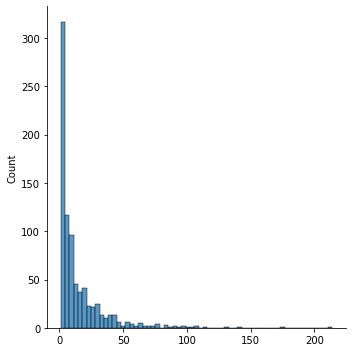

In [13]:
## look at the distribution of the review in histgram.

tmp = df.groupby('business_id').size().sort_values(ascending= False)

sns.displot(data=tmp)

In [14]:
tmp[tmp >= 100].shape

(9,)

In [15]:
#summary statistics for review counts for each of the 825 restaurants

tmp.describe()

count    825.000000
mean      14.701818
std       21.051677
min        1.000000
25%        3.000000
50%        7.000000
75%       19.000000
max      214.000000
dtype: float64

In [16]:
##Insight:  
##  The cleveland 2019 dataset contains 12129 review observations. 75% of the restaurants received less than 20 reviews in 2019, 
##  with the average count being around 15 and median count being 21. 
### Although only 9 restaurants were able to receive over 100 reviews, the most popular restaurant- Townhall- gained 214 reviews in just one year. 

In [28]:
# rename the stars_x column as 'rating', which represents the overall ratings of the resturants 

df.rename(columns={'stars_x':'rating'},inplace=True)

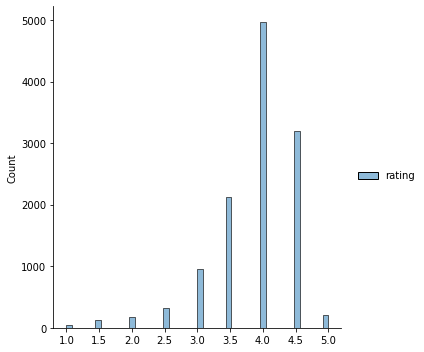

In [32]:
# The distributions of the "overall ratings" of the resturants
# Most of the overall ratings fall in the range of 3.5 to 4.5, with the largest portion of ratings being 4.5. 

rating= df[['rating']]
sns.displot(rating)

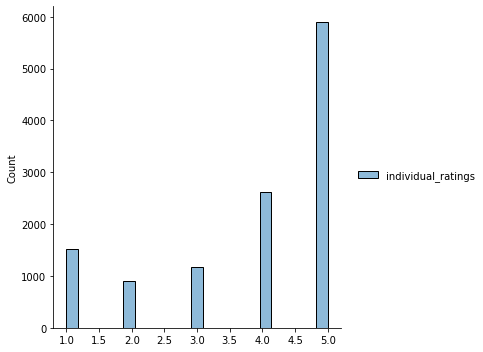

In [42]:
# The distributions of  each's reviews ratings of the resturants (one resturants might have multiple reviews rating :stars_y)
# The majority of the user reviews gavea 5.0 out of 5.0 rating, suggesting that most of the customers tend to leave reviews when they were very happy about their dining experiences. 

df.rename(columns={'stars_y':'individual_ratings'},inplace=True)
individual_ratings= df[['individual_ratings']]

sns.displot(individual_ratings)

In [43]:
#  Examine the most popular resturants in Cleveland (with most reviews)

df.loc['LNsZJP6jZ11e0tDljOLPiQ'].head(5)
#df.sort_values(by='review_count',ascending=False)


name  ...                 date
business_id                       ...                     
LNsZJP6jZ11e0tDljOLPiQ  Townhall  ...  2019-03-19 02:13:36
LNsZJP6jZ11e0tDljOLPiQ  Townhall  ...  2019-03-14 04:50:08
LNsZJP6jZ11e0tDljOLPiQ  Townhall  ...  2019-02-01 20:48:34
LNsZJP6jZ11e0tDljOLPiQ  Townhall  ...  2019-03-29 18:22:41
LNsZJP6jZ11e0tDljOLPiQ  Townhall  ...  2019-05-19 00:34:06

[5 rows x 21 columns]

In [44]:
df.useful.unique()

array([  4.,   0.,   3.,   1.,   2.,   6.,   8.,   7.,   9.,   5.,  10.,
        12.,  11.,  13.,  16.,  17.,  18.,  14.,  68.,  21.,  26.,  39.,
        24.,  15., 103.,  20.])

In [45]:
txt = [t.lower() for t in df['text']]
len(txt)



12129

## Part2: Word frequency and WordCloud analysis 

In [46]:
 # TEXT ANALYSIS
 
 
 import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
STOPWORDS = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [47]:
PATTERN = "[\w']+"

cv = CountVectorizer(max_features=250, stop_words=STOPWORDS, ngram_range=(1,1), binary=True,token_pattern=PATTERN)
tokens = cv.fit_transform(txt)
tarr= tokens.toarray()

In [48]:
# Look at the most commonm words appear in reviews and their count number 

cv.vocabulary_
cv.get_feature_names()

t = pd.DataFrame(tarr, columns=cv.get_feature_names())
t.head()
t.sum(axis=0).sort_values(ascending=False).head(50)

food          6004
good          4414
great         4287
place         4249
service       3700
back          2992
time          2688
like          2570
one           2468
would         2453
go            2329
also          2288
get           2283
delicious     2230
ordered       2080
really        2066
restaurant    1994
cleveland     1985
got           1924
best          1864
nice          1818
menu          1807
well          1754
definitely    1698
try           1651
order         1646
came          1616
us            1608
friendly      1607
staff         1601
amazing       1570
chicken       1523
even          1517
little        1483
love          1407
come          1403
i've          1403
bar           1400
recommend     1349
made          1347
i'm           1347
went          1337
first         1326
experience    1250
sauce         1223
could         1214
never         1181
always        1180
fresh         1152
everything    1149
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

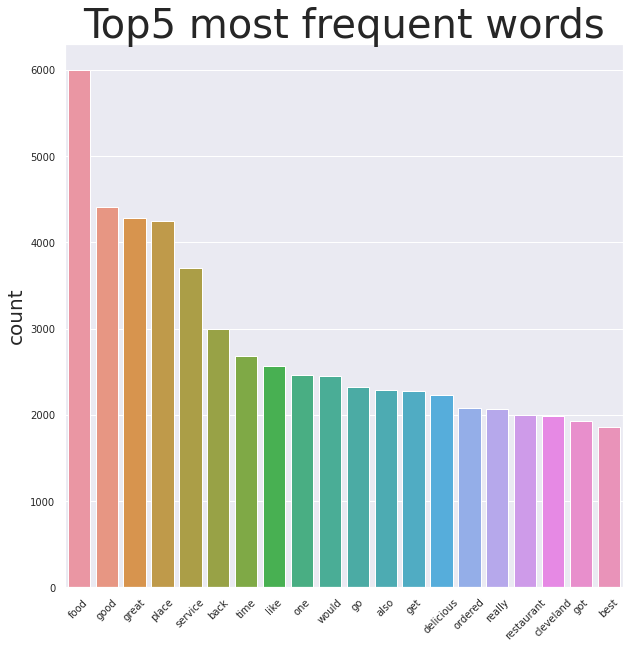

In [49]:
# TOP 20 most frequent words

stop2=["come","back","really","go","ever",'every','make','sure','food','service','ohio','recommend','would','definitely','time','pretty','even','though','next']


sns.set(rc={'figure.figsize':(10,10)})
freq_word = t.sum(axis=0).sort_values(ascending=False).head(20)

freq_word = pd.DataFrame(freq_word)
freq_word.columns=['count']

b= sns.barplot(data=freq_word, x=freq_word.index, y='count' )
b.axes.set_title("Top5 most frequent words",fontsize=40)
# b.set_xlabel(fontsize=40)
b.set_ylabel("count",fontsize=20)
b.tick_params(labelsize=10)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

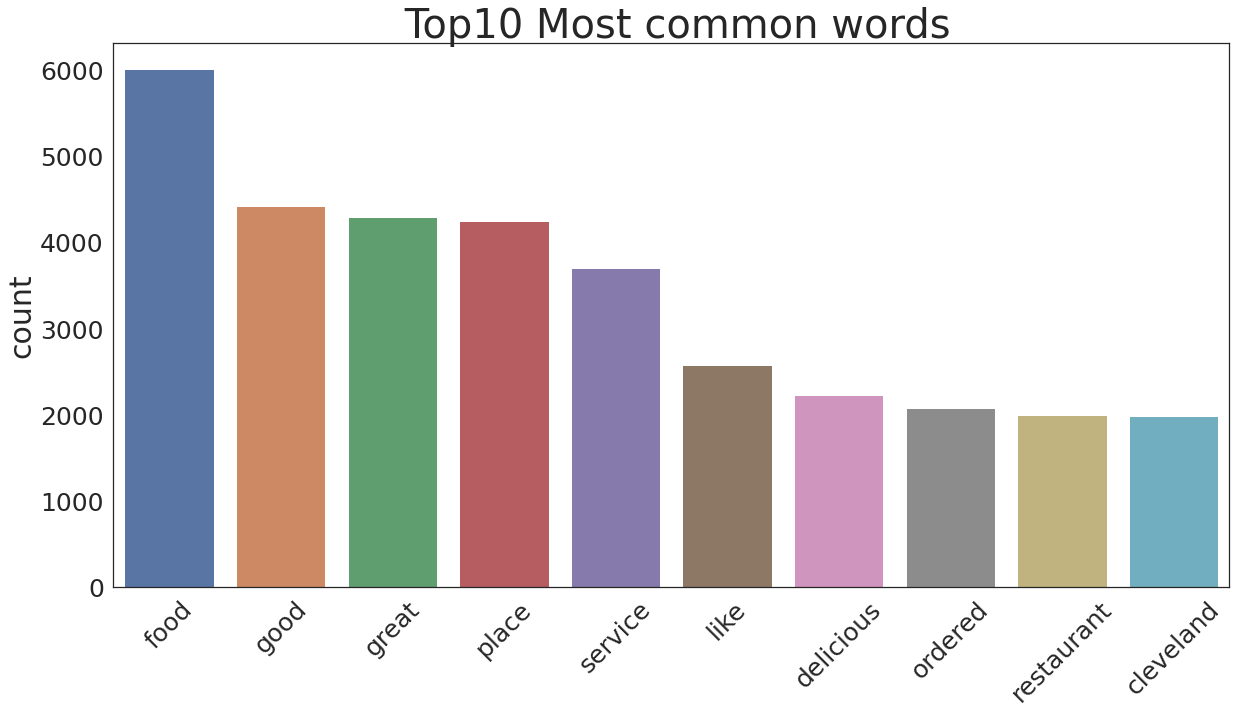

In [50]:
## Look at the TOP 20  most commonm words appeared in reviews and their count number
##  Excluding some of the words as belows   


## excluding some of the words we are not interested :
stop2=["come",'also',"back","really","go","ever",'every','make','sure','recommend','would','definitely','time','pretty','even','though','next','got','get','one','time']

stopwords2= set(STOPWORDS)
stopwords2.update(stop2)

cv_clean = CountVectorizer(max_features=250, stop_words=stopwords2, ngram_range=(1,1), binary=True,token_pattern=PATTERN)
tokens_clean = cv_clean.fit_transform(txt)

cv_clean.vocabulary_
cv_clean.get_feature_names()
tarr_clean = tokens_clean.toarray()

t_clean = pd.DataFrame(tarr_clean, columns=cv_clean.get_feature_names())
t_clean.sum(axis=0).sort_values(ascending=False).head(50)


sns.set(rc={'figure.figsize':(20,10)})
freq_word_clean = t_clean.sum(axis=0).sort_values(ascending=False).head(10)

freq_word_clean = pd.DataFrame(freq_word_clean)
freq_word_clean.columns=['count']

sns.set_style("white")
fq= sns.barplot(data=freq_word_clean, x=freq_word_clean.index, y='count' )
fq.axes.set_title(" Top10 Most common words",fontsize=40)
# b.set_xlabel(fontsize=40)
fq.set_ylabel("count",fontsize=30)
fq.tick_params(labelsize=25)
plt.xticks(rotation = 45)



In [51]:
PATTERN = "[\w']+"


stop=["come","back","really","go","ever",'every','make','sure','food','service','ohio','recommend','would','definitely','time','pretty','even','though','next']
stopwords= set(STOPWORDS)
stopwords.update(stop)

cv2 = CountVectorizer(max_features=250, stop_words=stopwords, ngram_range=(2,2), binary=True,token_pattern=PATTERN)
tokens2 = cv2.fit_transform(txt)
cv2.vocabulary_
cv2.get_feature_names()
tarr2= tokens2.toarray()

In [52]:
t2 = pd.DataFrame(tarr2, columns=cv2.get_feature_names())
t2.head()
t2.sum(axis=0).sort_values(ascending=False).head(50)

happy hour            362
great place           296
staff friendly        240
one best              237
love place            217
can't wait            216
5 stars               199
one favorite          182
ice cream             179
feel like             169
place great           159
tasted like           157
friendly staff        152
mac cheese            151
chicken sandwich      151
great experience      150
little italy          150
fried chicken         149
great atmosphere      138
parking lot           130
wait staff            128
pork belly            127
20 minutes            126
i've never            125
15 minutes            125
felt like             122
also ordered          121
super friendly        121
10 minutes            121
beer selection        120
best i've             118
last night            118
also good             116
good great            115
much better           115
also got              115
30 minutes            114
place good            114
sat bar     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

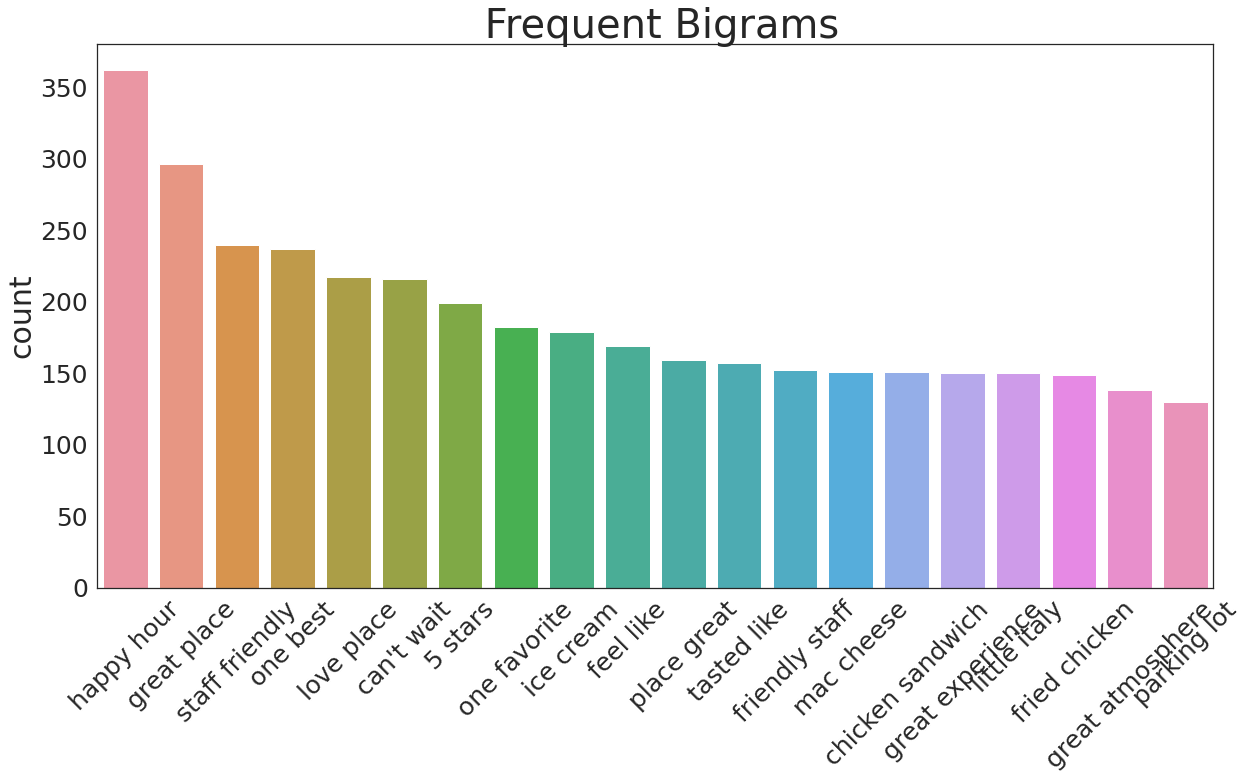

In [53]:
## TOP 20 most frequent bigram(already excluded some of the words we are not interested )


freq_word2 = t2.sum(axis=0).sort_values(ascending=False).head(20)

freq_word2 = pd.DataFrame(freq_word2)
freq_word2.columns=['count']

c = sns.barplot(data=freq_word2, x=freq_word2.index, y='count' )

sns.set_style("white")
c.axes.set_title(" Frequent Bigrams",fontsize=40)
# b.set_xlabel(fontsize=40)
c.set_ylabel("count",fontsize=30)
c.tick_params(labelsize=25)
plt.xticks(rotation = 45)

In [54]:
PATTERN = "[\w']+"

cv3 = CountVectorizer(max_features=250, stop_words=stopwords, ngram_range=(3,3), binary=True,token_pattern=PATTERN)
tokens3 = cv3.fit_transform(txt)
cv3.vocabulary_
cv3.get_feature_names()
tarr3= tokens3.toarray()

t3 = pd.DataFrame(tarr3, columns=cv3.get_feature_names())
t3.head()
t3.sum(axis=0).sort_values(ascending=False).head(50)

seated right away           46
one favorite places         44
mac n cheese                44
west side market            38
sweet potato fries          37
can't say enough            37
staff super friendly        36
french onion soup           35
roll hall fame              34
can't wait try              33
happy hour menu             32
one favorite restaurants    31
try something new           31
beef noodle soup            31
rock roll hall              29
made us feel                26
great beer selection        24
nothing write home          24
overall great experience    24
fried chicken sandwich      23
christmas story house       23
total reviews 2019          23
hot chicken sandwich        23
yelp reviews reviewed       23
give another try            22
great happy hour            22
3 5 stars                   22
went happy hour             22
staff always friendly       21
one best i've               21
fried green tomatoes        20
enough good things          20
give pla

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

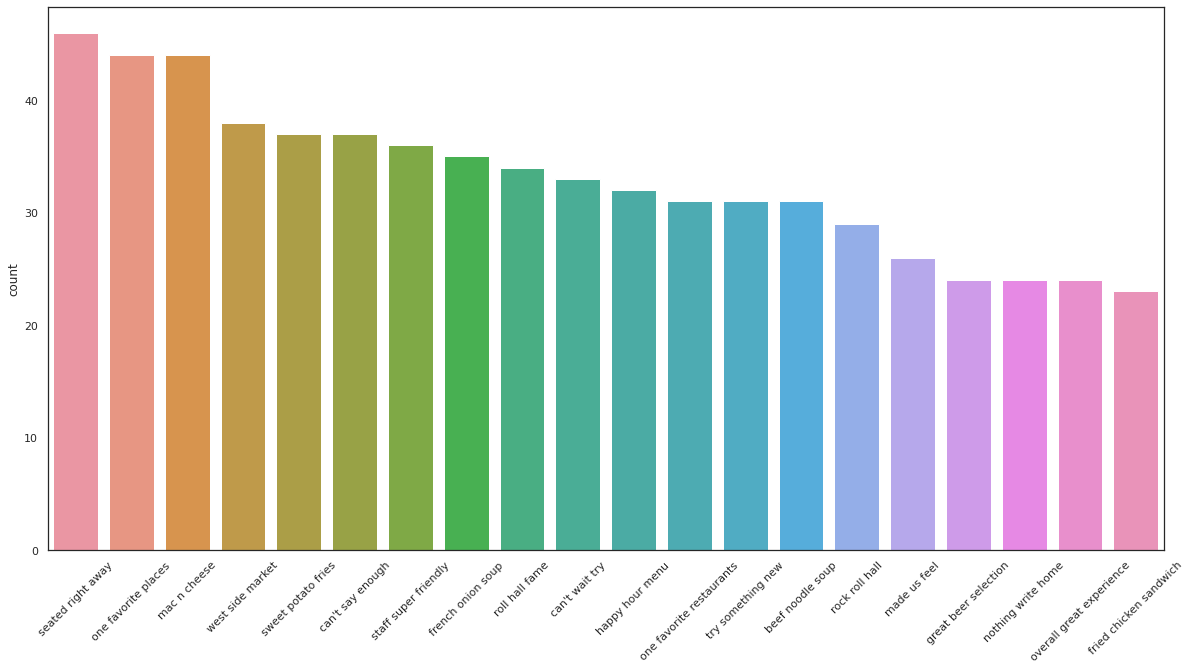

In [55]:
## TOP 20 most frequent trigram (excluded some of the words we are not interested)

freq_word3 = t3.sum(axis=0).sort_values(ascending=False).head(20)

freq_word3 = pd.DataFrame(freq_word3)
freq_word3.columns=['count']

sns.barplot(data=freq_word3, x=freq_word3.index, y='count' )
plt.xticks(rotation = 45)




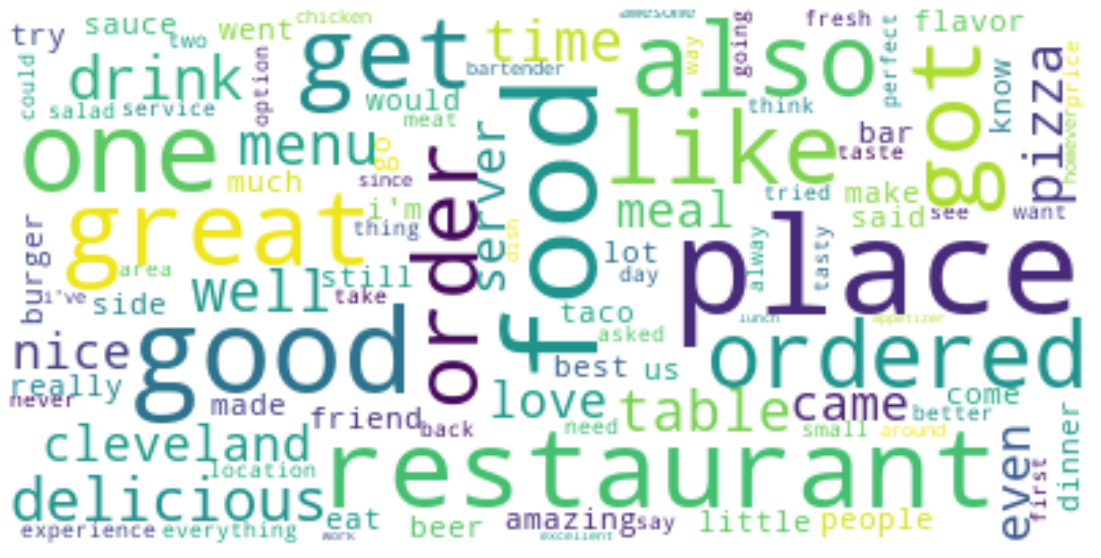

In [56]:
## Create a word cloud for all the reviews 


sns.set(rc={'figure.figsize':(20,10)})

text = df['text'].copy()
wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=100, background_color="white").generate(' '.join(t for t in text))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

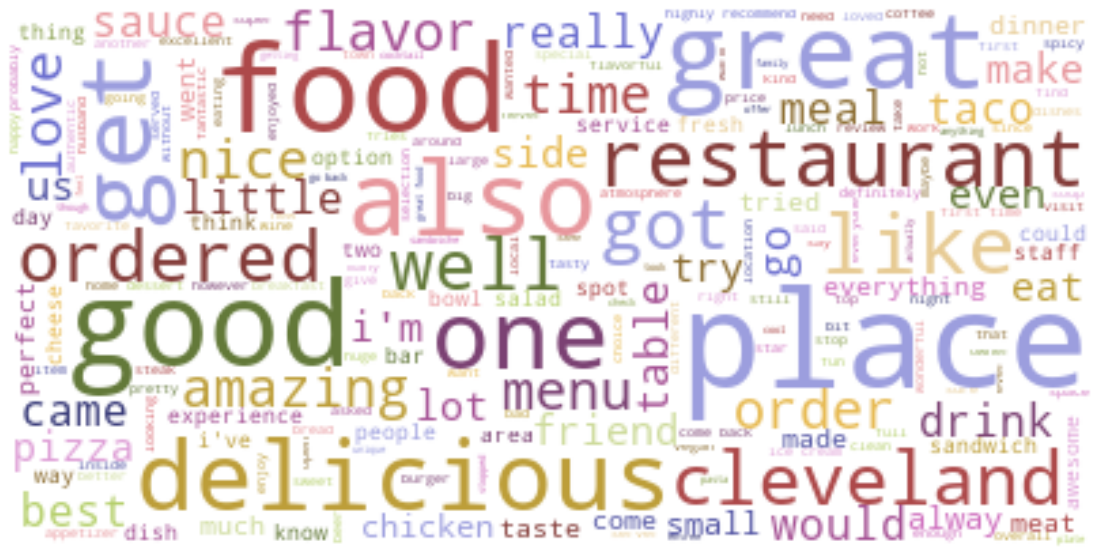

In [57]:
# Create a word cloud for all those reviews related to the highest rating resturants


high_df = df[df.rating>= 4.5]

text1 = high_df['text']
sns.set(rc={'figure.figsize':(20,10)})

wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=1000, background_color="white",colormap= 'tab20b').generate(' '.join(t for t in text1))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

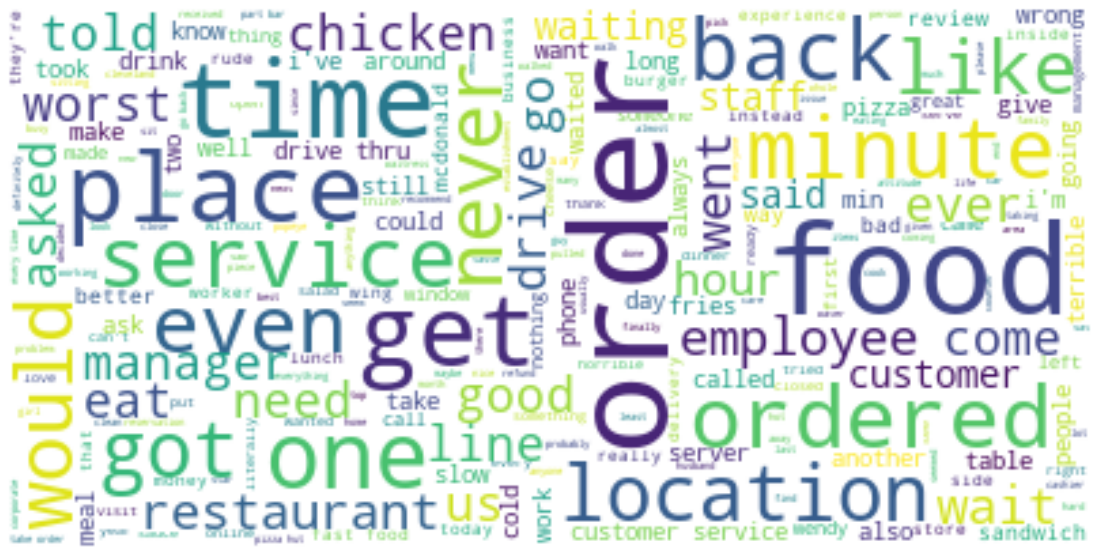

In [58]:
## Create a word cloud for all those reviews related to the lowest rating resturants


low_df = df[df.rating <= 2]

text2 = low_df['text']
sns.set(rc={'figure.figsize':(20,10)})


wordcloud = WordCloud(stopwords=STOPWORDS,max_font_size=50, max_words=1000, background_color="white").generate(' '.join(t for t in text2))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Part3: Topic Modeling

In [59]:

higher_df = df[(df['rating']>4)  & (df['individual_ratings']> 4)]



lower_df = df[(df['rating']<3.5) & (df['individual_ratings'] < 3.5)]


In [60]:
PATTERN = "[\w']+"

cv_higher = CountVectorizer(max_features=250, stop_words=STOPWORDS, ngram_range=(1,2), binary=True,token_pattern=PATTERN)
tokens = cv.fit_transform(higher_df.text)
tarr= tokens.toarray()



In [61]:
higher_df.shape

(2255, 21)

In [62]:
lower_df.shape

(1064, 21)

In [63]:
import nltk
nltk.download('wordnet')

import string
import itertools 
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.stem import PorterStemmer
import nltk


stops = ['the','a','an','and','but','if','or','because','as','what','which','this','that','these','those','then','went','think','order','yelp','review'
              'just','so','than','such','both','through','about','for','is','of','while','during','to','What','Which','get','always','got','came',
              'Is','If','While','This',"come","back","really","go","ever",'every','make','sure','also','well','ohio','recommend','would',
              'definitely','time','pretty','even','though','next','like','restaurant','very','veri','cleveland','food','place']


stopwords= set(STOPWORDS)
stopwords.update(stops)


# punct = list(string.punctuation)
# punct.append("''")
# punct.append(":")
# punct.append("...")
# punct.append("@")
# punct.append('""')



def cleanData(text, lowercase = False, remove_stops = False, stemming = False, lemmatization = False):
    
    txt = str(text)
    
    txt = re.sub(r'[^A-Za-z\s]',r' ',txt)
    
     
    if lowercase:
        txt = " ".join([w.lower() for w in txt.split()])
        
    if remove_stops:
        txt = " ".join([w for w in txt.split() if w not in stops])

    if stemming:
        st = PorterStemmer()
        txt = " ".join([st.stem(w) for w in txt.split()])
        wordnet_lemmatizer = WordNetLemmatizer()
        txt = " ".join([wordnet_lemmatizer.lemmatize(w, pos='v') for w in txt.split()])

    return txt
    


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [64]:
df['text']=df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))

higher_df['text'] = higher_df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))
lower_df['text'] = lower_df['text'].map(lambda x: cleanData(x, lowercase=True, remove_stops=True,stemming=True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
!pip install pyLDAvis

!python -m pip install -U pyLDAvis

!pip install --upgrade pandas==1.2

In [66]:
# 
CV_all = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS_all = CV_all.fit_transform(df.text)

CV_all_bi = CountVectorizer(min_df=5, max_df=0.8, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS_bi_all = CV_all_bi.fit_transform(df.text)


from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda_all = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda_all = lda_all.fit_transform(TOKENS_all)

import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_all, TOKENS_all, CV_all, mds='tsne')
vis


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  28.450659
3       0.648955  71.707100       2        1  20.856541
4      71.019684   9.971006       3        1  15.893567
9       3.785981  33.185135       4        1  11.060808
1     -42.666500  -9.222070       5        1   9.472104
8      -3.621689 -43.526516       6        1   3.731996
6      -3.632402  -4.171708       7        1   3.574328
0     -36.584400  35.804413       8        1   3.499109
7      44.391380  50.615383       9        1   1.870452
2      40.235809 -31.591665      10        1   1.590436, topic_info=          Term         Freq        Total Category  logprob  loglift
11607    pizza  1712.000000  1712.000000  Default  30.0000  30.0000
3779    delici  2610.000000  2610.000000  Default  29.0000  29.0000
14700    staff  1720.000000  1720.000000  Default  28.0000  28.0000
2995     coffe   702.000000   702.000000  Default  27.0000  27.0000
15377     taco  1152.000000  1152.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3450   creativ    60.981210    88.764499  Topic10  -5.0810   3.7657
4709    effici    47.426290   101.777115  Topic10  -5.3324   3.3776
14687    squar    55.549691   176.075138  Topic10  -5.1743   2.9875
5616      fire    39.835867   125.193726  Topic10  -5.5068   2.9961
2254    butter    46.237542   279.711613  Topic10  -5.3578   2.3412

[634 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
85         2  0.985611  acknowledg
151        5  0.991207      afford
158        1  0.997543   afternoon
174        6  0.992303       ahead
199        8  0.986230         ale
...      ...       ...         ...
17540      6  0.105533        year
17560      2  0.994069        yell
17589      3  0.275073         yum
17589      4  0.172720         yum
17589      6  0.543749         yum

[1311 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 5, 10, 2, 9, 7, 1, 8, 3])

In [67]:
lda_all_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda_all_bi = lda_all_bi.fit_transform(TOKENS_bi_all)


pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_all_bi, TOKENS_bi_all, CV_all_bi, mds='tsne')
vis


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  11.789057
4       0.648955  71.707100       2        1  10.941654
2      71.019684   9.971006       3        1  10.552795
3       3.785981  33.185135       4        1  10.436539
1     -42.666500  -9.222070       5        1   9.505798
7      -3.621689 -43.526516       6        1   9.422187
8      -3.632402  -4.171708       7        1   9.396457
5     -36.584400  35.804413       8        1   9.331613
6      44.391380  50.615383       9        1   9.325072
0      40.235809 -31.591665      10        1   9.298827, topic_info=                Term        Freq       Total Category  logprob  loglift
5307      happi hour  458.000000  458.000000  Default  30.0000  30.0000
5643       ice cream  284.000000  284.000000  Default  29.0000  29.0000
2456   custom servic  303.000000  303.000000  Default  28.0000  28.0000
5143    great servic  360.000000  360.000000  Default  27.0000  27.0000
9985    servic great  291.000000  291.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
6188     littl itali   49.562642  151.270788  Topic10  -5.6191   1.2594
10877     still good   41.009642   74.704095  Topic10  -5.8085   1.7756
11284      take home   39.580331   77.792790  Topic10  -5.8440   1.6996
6891      melt mouth   37.370900   63.461858  Topic10  -5.9014   1.8457
6634       mac chees   38.524565  228.020092  Topic10  -5.8710   0.5971

[410 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
15         2  0.966327     abov beyond
19        10  0.995782  absolut delici
31         2  0.991094    absolut love
56         4  0.875949   across street
56         5  0.123531   across street
...      ...       ...             ...
12786      8  0.981326     worth price
12790      7  0.974087       worth tri
12792      6  0.976881     worth visit
12793      8  0.981244      worth wait
12807      2  0.984947    write review

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 3, 4, 2, 8, 9, 6, 7, 1])

In [68]:
CV = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS1 = CV.fit_transform(higher_df.text)

CV_bi = CountVectorizer(min_df=5, max_df=0.6, stop_words=stopwords, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS1_bi = CV_bi.fit_transform(higher_df.text)

<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:4: DeprecationWarning: invalid escape sequence \-
<ipython-input-68-22d366f5d67a>:1: DeprecationWarning: invalid escape sequence \-
  CV = CountVectorizer(min_df=5, max_df=0.25, stop_words=stopwords, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
<ipython-input-68-22d366f5d67a>:4: DeprecationWarning: invalid escape sequence \-
  CV_bi = CountVectorizer(min_df=5, max_df=0.6, stop_words=stopwords, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


In [69]:
# topic modeling

# Latent Dirichlet Allocation Model

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda1 = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda1 = lda1.fit_transform(TOKENS1)




iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [70]:
#！pip install pyLDAvis

!python -m pip install -U pyLDAvis

In [71]:

import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda1, TOKENS1, CV, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  28.544135
4       0.648955  71.707100       2        1  21.974128
5      71.019684   9.971006       3        1  11.602511
7       3.785981  33.185135       4        1   8.498970
2     -42.666500  -9.222070       5        1   7.833590
3      -3.621689 -43.526516       6        1   7.794871
8      -3.632402  -4.171708       7        1   5.223644
1     -36.584400  35.804413       8        1   3.720799
9      44.391380  50.615383       9        1   2.933870
6      40.235809 -31.591665      10        1   1.873482, topic_info=          Term        Freq       Total Category  logprob  loglift
2533      soup  287.000000  287.000000  Default  30.0000  30.0000
1875     noodl  240.000000  240.000000  Default  29.0000  29.0000
1646      love  666.000000  666.000000  Default  28.0000  28.0000
258       best  546.000000  546.000000  Default  27.0000  27.0000
547      coffe  201.000000  201.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1821      must   14.653828  112.766970  Topic10  -4.6784   1.9367
2132     price   12.834851  248.148439  Topic10  -4.8109   1.0155
2863       two   12.049305  176.945797  Topic10  -4.8741   1.2905
1121  friendli   12.629775  433.920081  Topic10  -4.8270   0.4406
1013      find   12.185848  252.351239  Topic10  -4.8628   0.9468

[680 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4         1  0.160818  absolut
4         2  0.107212  absolut
4         3  0.178687  absolut
4         4  0.160818  absolut
4         6  0.166774  absolut
...     ...       ...      ...
3029      6  0.243266     work
3032      2  0.881222   worker
3032      5  0.076628   worker
3062      3  0.797356      yum
3062      6  0.184005      yum

[1482 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 8, 3, 4, 9, 2, 10, 7])

In [72]:
lda1_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda1_bi = lda1_bi.fit_transform(TOKENS1_bi)


import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis_bi = pyLDAvis.sklearn.prepare(lda1_bi, TOKENS1_bi, CV_bi, mds='tsne')
vis_bi

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
4      32.420952   8.115230       1        1  12.112198
6       0.648955  71.707100       2        1  11.877678
5      71.019684   9.971006       3        1  11.734202
9       3.785981  33.185135       4        1  11.265522
8     -42.666500  -9.222070       5        1  11.133589
1      -3.621689 -43.526516       6        1   9.350894
7      -3.632402  -4.171708       7        1   8.405578
0     -36.584400  35.804413       8        1   8.402728
2      44.391380  50.615383       9        1   8.292439
3      40.235809 -31.591665      10        1   7.425173, topic_info=              Term       Freq      Total Category  logprob  loglift
558      ice cream  88.000000  88.000000  Default  30.0000  30.0000
498   great servic  88.000000  88.000000  Default  29.0000  29.0000
723       one best  65.000000  65.000000  Default  28.0000  28.0000
203      corn beef  79.000000  79.000000  Default  27.0000  27.0000
716     noodl soup  52.000000  52.000000  Default  26.0000  26.0000
..             ...        ...        ...      ...      ...      ...
420     give great   7.223344   8.039962  Topic10  -4.7124   2.4932
13       amaz best   7.186121   8.002776  Topic10  -4.7175   2.4927
503  great suggest   7.164498   7.981677  Topic10  -4.7206   2.4923
715     noodl dish  11.404387  16.495125  Topic10  -4.2557   2.2312
600    littl itali  11.127120  22.704071  Topic10  -4.2803   1.8871

[432 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2         4  0.942505     absolut amaz
4         5  0.977514   absolut delici
5         5  0.918684  absolut favorit
7         4  0.216067     absolut love
7         5  0.561775     absolut love
...     ...       ...              ...
1116      4  0.937754       worth wait
1119      9  0.873322        xiao long
1120      7  0.712226         year ago
1120     10  0.237409         year ago
1121      3  0.876952         year old

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 6, 10, 9, 2, 8, 1, 3, 4])

In [73]:
CV2 = CountVectorizer(min_df=5, max_df=0.2, stop_words=stopwords2, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS2 = CV2.fit_transform(lower_df.text)


from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD


NUM_TOPICS = 10

lda2 = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online',verbose=True)
data_lda2 = lda2.fit_transform(TOKENS2)



<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-73-75a3b6ba3cce>:1: DeprecationWarning: invalid escape sequence \-
  CV2 = CountVectorizer(min_df=5, max_df=0.2, stop_words=stopwords2, ngram_range=(1,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')


iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


In [74]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis2 = pyLDAvis.sklearn.prepare(lda2, TOKENS2, CV2, mds='tsne')
vis2

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952   8.115230       1        1  38.182878
6       0.648955  71.707100       2        1  16.909198
1      71.019684   9.971006       3        1  15.962015
4       3.785981  33.185135       4        1   9.249491
7     -42.666500  -9.222070       5        1   6.271616
3      -3.621689 -43.526516       6        1   4.330973
0      -3.632402  -4.171708       7        1   3.988291
2     -36.584400  35.804413       8        1   3.275748
8      44.391380  50.615383       9        1   1.041981
9      40.235809 -31.591665      10        1   0.787809, topic_info=        Term        Freq       Total Category  logprob  loglift
669     hour  213.000000  213.000000  Default  30.0000  30.0000
1619   worst  145.000000  145.000000  Default  29.0000  29.0000
1423    taco   65.000000   65.000000  Default  28.0000  28.0000
264    close   90.000000   90.000000  Default  27.0000  27.0000
916    never  258.000000  258.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
1117   readi    1.084698   53.745406  Topic10  -5.6356   0.9407
1619   worst    1.388736  145.030343  Topic10  -5.3885   0.1951
1447    tell    0.930726  240.461898  Topic10  -5.7887  -0.7107
1320  someth    0.848872   92.932607  Topic10  -5.8807   0.1479
1230  select    0.725937   31.423702  Topic10  -6.0372   1.0758

[612 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2         1  0.284493    absolut
2         4  0.213370    absolut
2         7  0.017781    absolut
2         8  0.408959    absolut
2         9  0.035562    absolut
...     ...       ...        ...
1635      1  0.233608   year ago
1635      6  0.584020   year ago
1636      3  0.843216   year old
1642      8  0.923977       zero
1643      8  0.889349  zero star

[1525 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 7, 2, 5, 8, 4, 1, 3, 9, 10])

In [75]:
CV2_bi = CountVectorizer(min_df=5, max_df=0.7, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
TOKENS2_bi = CV2_bi.fit_transform(lower_df.text)



lda2_bi = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=8, learning_method='online',verbose=True)
data_lda2_bi = lda2_bi.fit_transform(TOKENS2_bi)


import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis2_bi = pyLDAvis.sklearn.prepare(lda2_bi, TOKENS2_bi, CV2_bi, mds='tsne')
vis2_bi

<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<input>:1: DeprecationWarning: invalid escape sequence \-
<ipython-input-75-279f915297a8>:1: DeprecationWarning: invalid escape sequence \-
  CV2_bi = CountVectorizer(min_df=5, max_df=0.7, stop_words=stopwords2, ngram_range=(2,2),lowercase=True,t

iteration: 1 of max_iter: 8
iteration: 2 of max_iter: 8
iteration: 3 of max_iter: 8
iteration: 4 of max_iter: 8
iteration: 5 of max_iter: 8
iteration: 6 of max_iter: 8
iteration: 7 of max_iter: 8
iteration: 8 of max_iter: 8


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  13.756606
6       0.648955  71.707100       2        1  13.004947
4      71.019684   9.971006       3        1  11.213850
7       3.785981  33.185135       4        1  10.048827
5     -42.666500  -9.222070       5        1   9.334733
0      -3.621689 -43.526516       6        1   9.278665
2      -3.632402  -4.171708       7        1   9.256430
1     -36.584400  35.804413       8        1   9.187963
9      44.391380  50.615383       9        1   7.551794
3      40.235809 -31.591665      10        1   7.366184, topic_info=               Term       Freq      Total Category  logprob  loglift
57    custom servic  61.000000  61.000000  Default  30.0000  30.0000
358      wait minut  59.000000  59.000000  Default  29.0000  29.0000
55         crab leg  32.000000  32.000000  Default  28.0000  28.0000
78       drive thru  38.000000  38.000000  Default  27.0000  27.0000
105       give star  29.000000  29.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
2     across street   2.991159   6.915474  Topic10  -4.3950   1.7702
61        dine room   5.286293  13.906671  Topic10  -3.8256   1.6410
131  horribl servic   4.019307  10.960495  Topic10  -4.0996   1.6051
218      phone call   3.277770   8.015570  Topic10  -4.3035   1.7140
224     poor servic   3.436056  19.336106  Topic10  -4.2564   0.8806

[375 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.209510  absolut horribl
0         8  0.628529  absolut horribl
1         1  0.767152    absolut worst
2         4  0.144603    across street
2         8  0.289206    across street
...     ...       ...              ...
381       7  0.623006     write review
382       3  0.250582         year ago
382       5  0.125291         year ago
382       8  0.626456         year ago
384       5  0.929473        zero star

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 8, 6, 1, 3, 2, 10, 4])

## Part4: Sentiment Analysis <br>

Perform sentiment analysis on the users' reviews to understand what factors lead to high customer satisfaction and what lead to low customer satisfaction. <br><br>

Packages used involve: TextBolb, Afinn Score,  Vader, and nltk.

In [98]:
df = cle_2019.copy()
df.head()
df.rename(columns={"stars_x":"rating"},inplace=True)
df.rename(columns={"stars_y":"individual_ratings"},inplace=True)

In [99]:
## Sentiment analysis

#TextBolb

def tb_p(text):
  p = TextBlob(text).sentiment.polarity
  return p

def tb_s(text):
  s = TextBlob(text).sentiment.subjectivity
  return s

df['polarity'] = df.text.apply(tb_p)
df['subjectivity'] = df.text.apply(tb_s)

df.head(3)


name  ... subjectivity
business_id                                              ...             
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...     0.590909
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...     0.611310
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...     0.454555

[3 rows x 23 columns]

In [100]:
## Examine the first review in the dataset

df.head(1).text.values

array(["New family business from Los Angeles. Pho was actually wonderful with accoutrements I haven't seen at other Vietnamese restaurants. Their goi cuon however came with a dipping sauce I've never even had before. I'm excited to try their other dishes."],
      dtype=object)

In [101]:
## Examine the first review in the dataset regarding the polarity and subjectivity

df.head(1)[['polarity','subjectivity']]

polarity  subjectivity
business_id                                   
98hyK2QEUeI8v2y0AghfZA  0.252273      0.590909

In [102]:
## The overall polarity and subjectivity for all the cleveland restaurants reviews in 2019 in our dataset

df[['polarity','subjectivity']].describe().T

count      mean       std  ...      50%       75%  max
polarity      12129.0  0.264918  0.241345  ...  0.27619  0.411458  1.0
subjectivity  12129.0  0.580723  0.131884  ...  0.58000  0.659336  1.0

[2 rows x 8 columns]

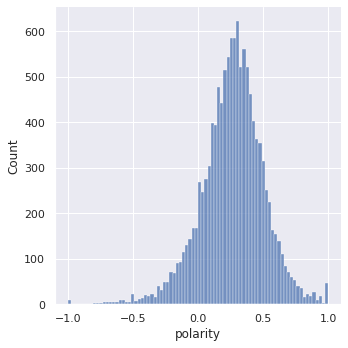

In [103]:
sns.displot(df.polarity)
plt.show()


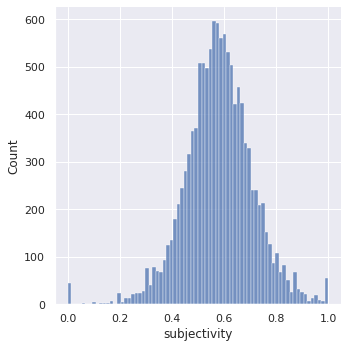

In [104]:
sns.displot(df.subjectivity)
plt.show()


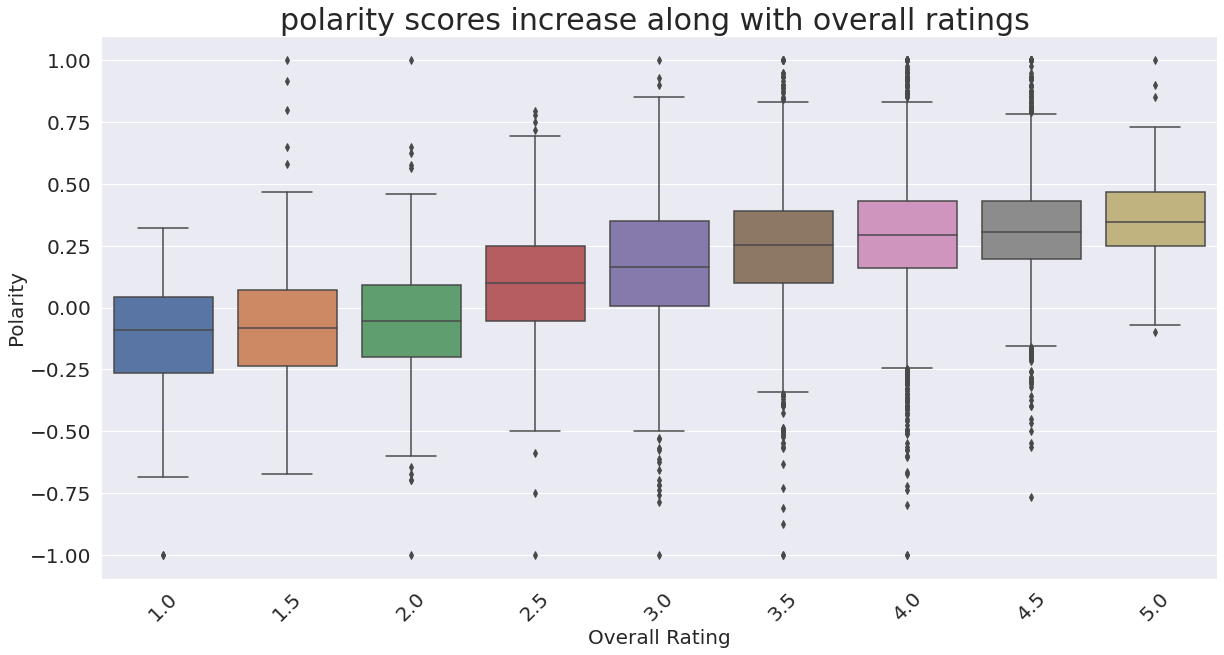

In [105]:
## the relationship between user view ratings and the polarity score 

ax=sns.boxplot(y="polarity", x="rating", data=df)


ax.axes.set_title("polarity scores increase along with overall ratings ",fontsize=30)
ax.set_ylabel("Polarity",fontsize=20)
ax.set_xlabel("Overall Rating",fontsize=20)
ax.tick_params(labelsize=20)
plt.xticks(rotation = 45)

plt.show()

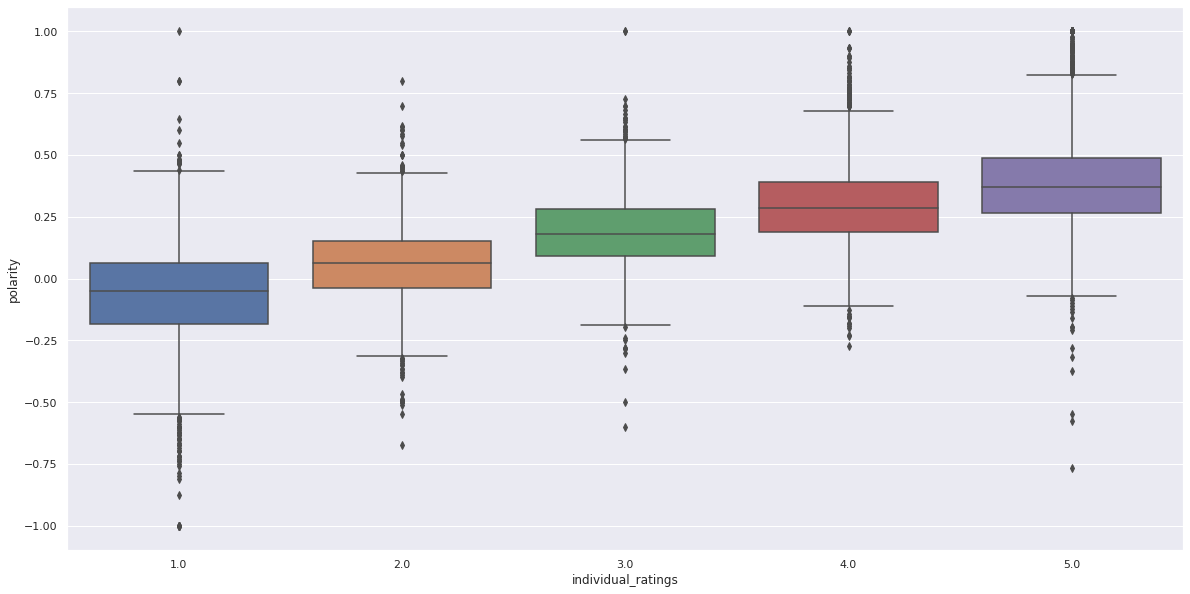

In [147]:
## the relationship between user view ratings and the polarity score 

w=sns.boxplot(y="polarity", x="individual_ratings", data=df)
plt.show()

w.axes.set_title("polarity scores increase along with individual user ratings ",fontsize=40)
w.set_ylabel("Polarity",fontsize=30)
w.set_xlabel("individual_ratings",fontsize=30)
w.tick_params(labelsize=25)


In [107]:
## Afinn Score
afinn = Afinn(language='en')


def sent_score(text):
  return afinn.score(text)

df['sent'] = df.text.apply(sent_score)

df.head()

name  ...  sent
business_id                                              ...      
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...   7.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  16.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  12.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  14.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  10.0

[5 rows x 24 columns]

In [108]:
df['sent'].describe().T

count    12129.000000
mean        11.370682
std         11.040199
min        -65.000000
25%          5.000000
50%         10.000000
75%         17.000000
max         97.000000
Name: sent, dtype: float64

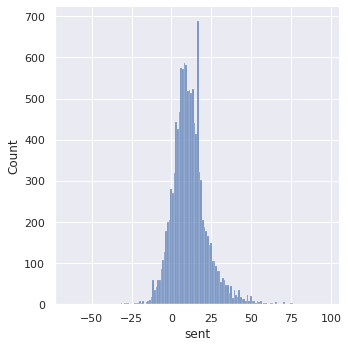

In [109]:
# The distribution of sentiment scores of reviews using  Afinn Score package
sns.displot(df.sent)
plt.show()


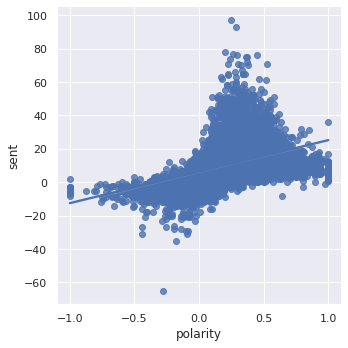

In [110]:
## the relationship between polarity and afinn score in our dataset

sns.lmplot(x="polarity", y="sent", data=df)
plt.show()


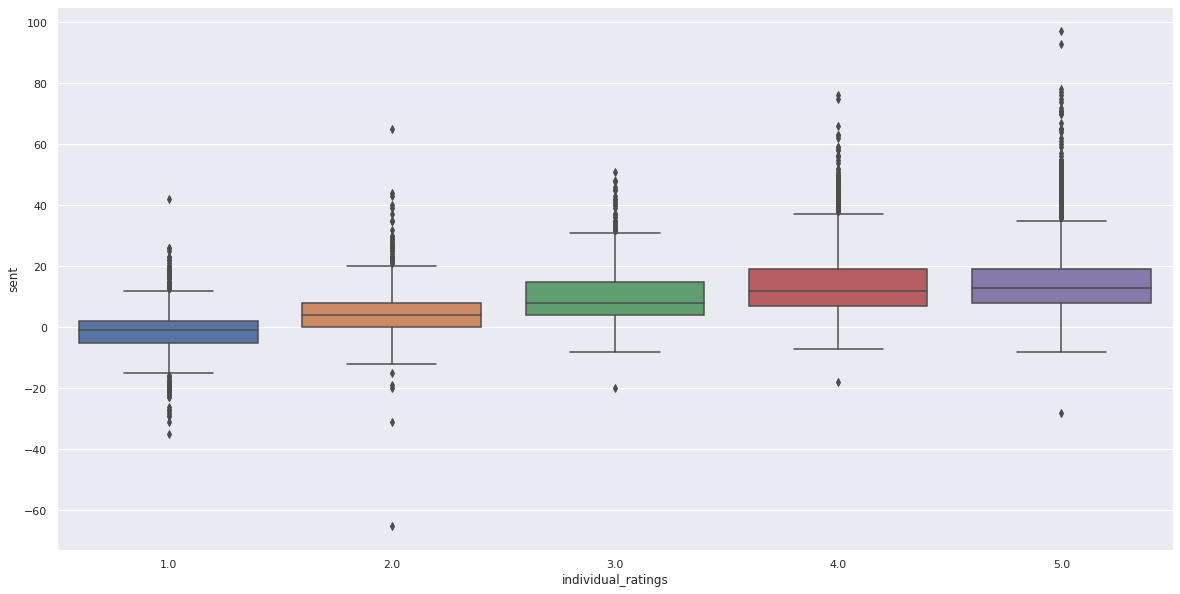

In [111]:
## the relationship between user review ratings and the affin score 

sns.boxplot(y="sent", x="individual_ratings", data=df)
plt.show()

In [112]:
df.head()

name  ...  sent
business_id                                              ...      
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...   7.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  16.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  12.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  14.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  10.0

[5 rows x 24 columns]

In [113]:
## The relationship between resturant ratings and the sentiment scores(mean) of the reviews

## Insights:
### Higher general rating resturants are associated with higher polairty score and higher sentiment score, 
### Addtionally, the higher rating restuarants tend to receive more reviews towards expressing personal feelings or opinions, rather than statements of facts.


df.groupby("rating").agg({'polarity':['size','mean'],'sent':['mean'],'subjectivity':['mean']})

polarity                 sent subjectivity
           size      mean       mean         mean
rating                                           
1.0          44 -0.146413  -4.363636     0.555395
1.5         127 -0.054028  -1.078740     0.561719
2.0         180 -0.053431  -0.011111     0.540632
2.5         317  0.095048   4.041009     0.543405
3.0         950  0.167032   7.020000     0.558770
3.5        2129  0.239577  10.618600     0.574846
4.0        4972  0.291625  12.239944     0.586738
4.5        3203  0.316226  13.572276     0.587169
5.0         207  0.359478  16.231884     0.606727

In [114]:
# The relationship between resturant ratings and the sentiment scores(median) of the reviews


df.groupby("rating").agg({'polarity':['size','median'],'sent':['median'],'subjectivity':['median']})

polarity             sent subjectivity
           size    median median       median
rating                                       
1.0          44 -0.091146   -3.5     0.560275
1.5         127 -0.081605   -1.0     0.550794
2.0         180 -0.055952   -1.0     0.554827
2.5         317  0.100000    3.0     0.558333
3.0         950  0.162582    6.0     0.559246
3.5        2129  0.252381    9.0     0.574074
4.0        4972  0.294683   11.0     0.583574
4.5        3203  0.305926   12.0     0.585714
5.0         207  0.347826   13.0     0.607181

In [115]:
# vader -- more suitable for social media

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [116]:
df.head()

name  ...  sent
business_id                                              ...      
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...   7.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  16.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  12.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  14.0
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  10.0

[5 rows x 24 columns]

In [117]:
df['compound'] = [vader.polarity_scores(v)['compound'] for v in df['text']]
df['neg'] = [vader.polarity_scores(v)['neg'] for v in df['text']]
df['neu'] = [vader.polarity_scores(v)['neu'] for v in df['text']]
df['pos'] = [vader.polarity_scores(v)['pos'] for v in df['text']]

In [118]:
df.head()

name  ...    pos
business_id                                              ...       
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  0.145
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  0.387
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  0.132
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  0.258
98hyK2QEUeI8v2y0AghfZA  Pho Lee's Vietnamese Restaurant  ...  0.262

[5 rows x 28 columns]

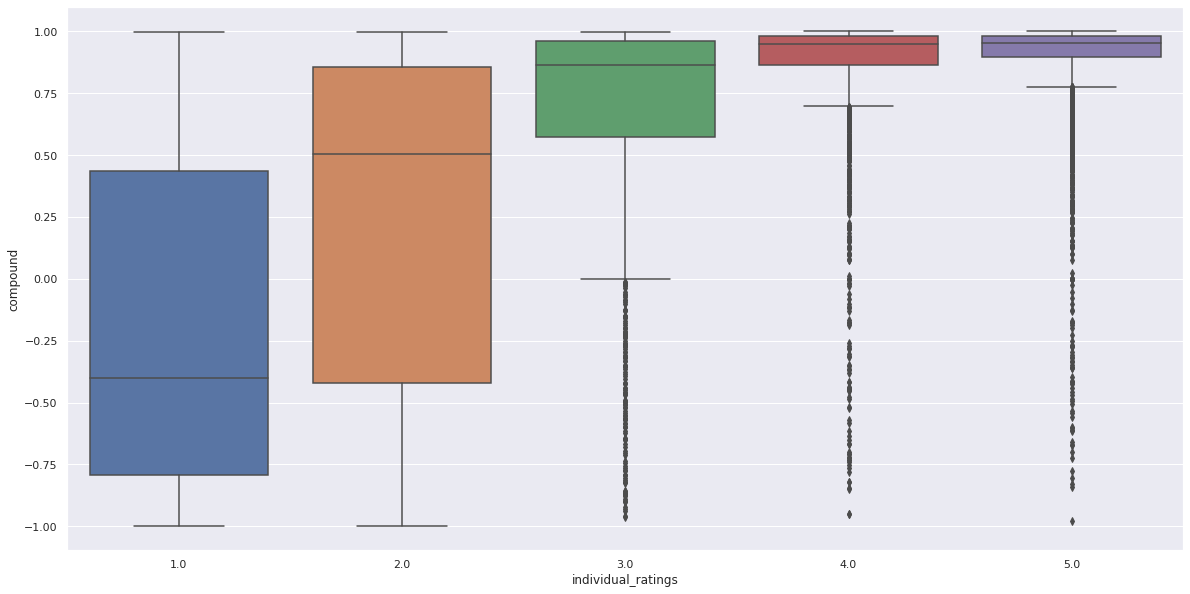

In [119]:
# the relationship between individual user ratings and the affin score 

sns.boxplot(y="compound", x="individual_ratings", data=df)
plt.show()

In [120]:
## The relationship between resturant ratings and the sentimemnt analysis scores
## look at mean 
## Compound scores tent to intensify the postive and negative score on a [1,-1] scale compared with polairty


df.groupby("rating").agg({'polarity':['size','mean'],'compound':['mean'],'sent':['mean'],'subjectivity':['mean'],'neg':['mean'],'neu':['mean'],'pos':['mean']})

polarity            compound  ...       neg       neu       pos
           size      mean      mean  ...      mean      mean      mean
rating                               ...                              
1.0          44 -0.146413 -0.365852  ...  0.141068  0.804318  0.054614
1.5         127 -0.054028 -0.153475  ...  0.107205  0.802220  0.090559
2.0         180 -0.053431 -0.084234  ...  0.100806  0.805750  0.093494
2.5         317  0.095048  0.259590  ...  0.076574  0.775855  0.147568
3.0         950  0.167032  0.437313  ...  0.063881  0.765774  0.170348
3.5        2129  0.239577  0.634132  ...  0.047145  0.744532  0.208324
4.0        4972  0.291625  0.734045  ...  0.037886  0.734042  0.228066
4.5        3203  0.316226  0.823219  ...  0.030053  0.722974  0.246967
5.0         207  0.359478  0.904071  ...  0.020768  0.720488  0.258744

[9 rows x 8 columns]

In [121]:
##  Examine the most popular resturants in Cleveland (with the largest number of reviews)---Townhall

df.loc['LNsZJP6jZ11e0tDljOLPiQ'].head(5)
#df.sort_values(by='review_count',ascending=False)
Townhall = df.loc['LNsZJP6jZ11e0tDljOLPiQ']
Townhall.head()

name         address  ...    neu    pos
business_id                                       ...              
LNsZJP6jZ11e0tDljOLPiQ  Townhall  1909 W 25th St  ...  0.656  0.318
LNsZJP6jZ11e0tDljOLPiQ  Townhall  1909 W 25th St  ...  0.720  0.280
LNsZJP6jZ11e0tDljOLPiQ  Townhall  1909 W 25th St  ...  0.780  0.200
LNsZJP6jZ11e0tDljOLPiQ  Townhall  1909 W 25th St  ...  0.784  0.096
LNsZJP6jZ11e0tDljOLPiQ  Townhall  1909 W 25th St  ...  0.755  0.245

[5 rows x 28 columns]

In [122]:
## The reviews of townhall' sentiment scores

Townhall[['polarity','compound','sent']].describe()

polarity    compound        sent
count  214.000000  214.000000  214.000000
mean     0.322718    0.752484   12.345794
std      0.228018    0.460771   10.000097
min     -0.433333   -0.971100   -9.000000
25%      0.179384    0.796025    6.000000
50%      0.330536    0.942600   12.000000
75%      0.447294    0.976275   17.000000
max      1.000000    0.999000   59.000000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


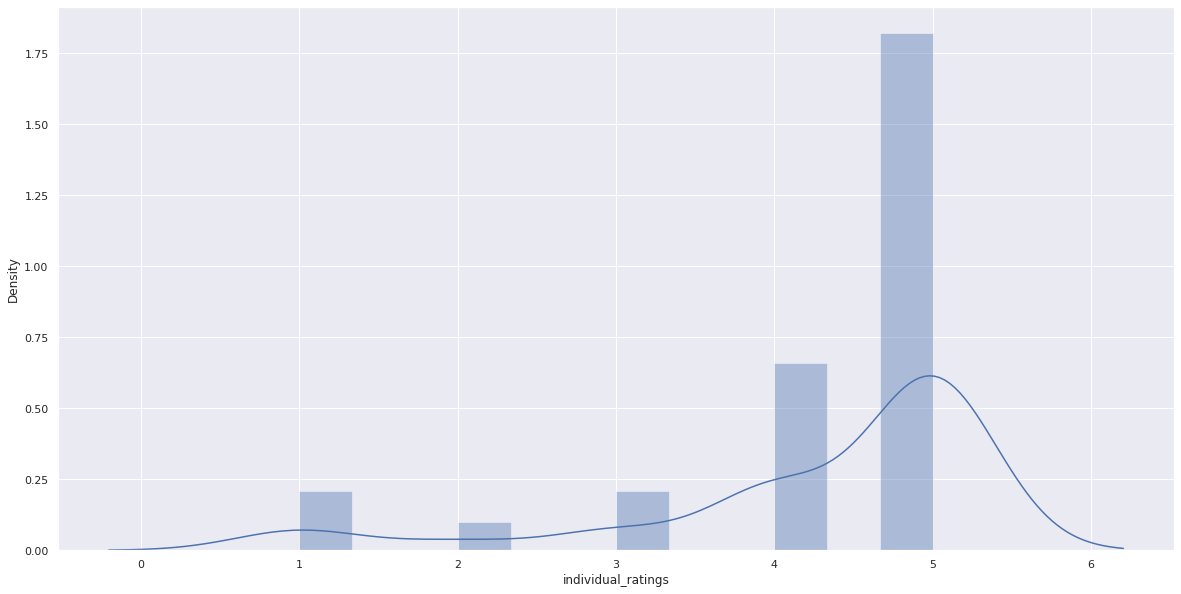

In [123]:
# Townhall will recieve low ratings from customers, but receive significantly more 5 star & 4 star ratings.  

sns.distplot(Townhall.individual_ratings)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

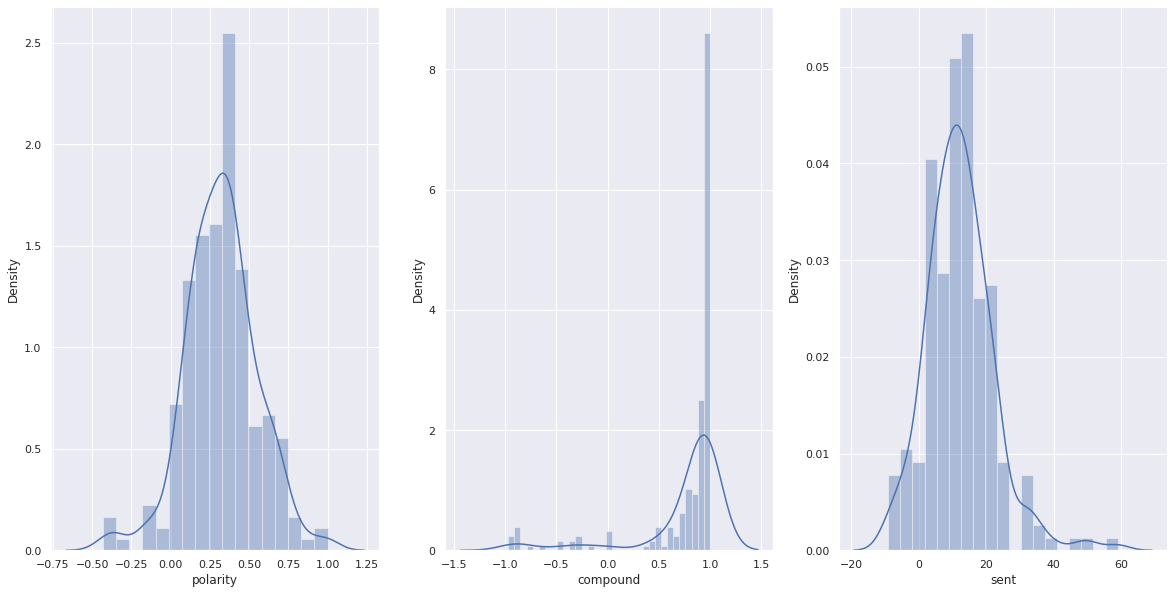

In [124]:
## Look at the specific sentiment score of Townhall's reviews

f, axes = plt.subplots(1, 3)

townhall = Townhall.reset_index(drop=True)

sns.distplot(townhall.polarity,ax=axes[0])
sns.distplot(townhall.compound,ax=axes[1])
sns.distplot(townhall.sent,ax=axes[2])

In [125]:
## Look at what are the hottest words appeared in Townhall's reviews


tokens_townhall = cv2.fit_transform(Townhall.text)
cv2.vocabulary_
cv2.get_feature_names()
tarr_townhall= tokens_townhall.toarray()

t_townhall = pd.DataFrame(tarr_townhall, columns=cv2.get_feature_names())
t_townhall.head()
t_townhall.sum(axis=0).sort_values(ascending=False).head(50)

truffle fries           22
non gmo                 14
gluten free             11
great place             10
veggie burger            9
sweet potato             8
great atmosphere         8
beer selection           7
dietary restrictions     7
smashed avocado          7
poke bowl                7
thai peanut              7
favorite restaurant      7
peanut bowl              6
place eat                6
grass fed                6
one favorite             6
chicken sandwich         6
reasonably priced        6
brussel sprouts          6
favorite place           6
lettuce wraps            6
also good                6
keto bun                 6
place cleveland          5
restaurant cleveland     5
dietary needs            5
craft beer               5
flat bread               5
great great              5
place good               5
town hall                5
keto friendly            5
chicken bowl             5
paleo keto               5
great beer               5
healthy options          5
g

In [126]:
## Insights:

##When analyzing the most popular restaurant in 2019 – the Townhall, 
## we noticed that healthy meals might be gaining more popularity than we expected, 
## as evidenced by the fact that gluten-free, veggie burger, keto bun, grass feed, and dietary restriction
## are among the hottest words in Townhall restaurant’ reviews. 



In [127]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [128]:
import random

## Part5: Key words Analysis<br>

Based on the previous word frequency and sentiment analysis, I would love to dive deeper into the reviews to understand more about the specific contexts of some keywords. For example, from word frequency and topic modelings, I noticed that words, such as "service","food", "manager", are some important terms in the yelp reviews. So, I would extract the contexts from these keywords to gain an better understanding of the customers perception of the resturants. 

In [129]:
# key word analysis


lower = df[df.polarity <=0]
higher = df[df.polarity > 0.3]

from nltk import Text

keyword_lower = lower.text
keyword_lower[:5]

corpus_lower = " ".join(keyword_lower)

tokens_lower = nltk.word_tokenize(corpus_lower)

text_lower= Text(tokens_lower)

# higher polarity 

keyword_higher = higher.text
keyword_higher[:5]

corpus_higher= " ".join(keyword_higher)

tokens_higher = nltk.word_tokenize(corpus_higher)

text_higher= Text(tokens_higher)



In [130]:
#look at service

text_lower.concordance("service",width=100)


Displaying 25 of 616 matches:
                                              service , I came with my family of four . No one gree
eese & rice here now , its 6:50pm only . Fast service & busy . Alright place . I rarely Chipotle no
e of the reviews just now ) at this place the service was s l o w . . so slow in pAST VISITS . not 
Heck , I left a few times because of the slow service . Just keep that in mind for here . I 've alw
 way too long . No efficiency here ! horrible service extremely slow that 's it already awkward whe
ctically Milk dip . The salsa was bland . The service was fine , the place itself was fine , but af
rrio is your place , horrible food , horrible service , horrible crowd . Do yourself a favor and co
 of day , age , what your ordered , etc ! Bad service . Bad food . Grimy menus . Barrio is an examp
wn several times . In addition to the abysmal service , the food was pretty bad . The tacos were so
 food was well priced and well made , but the service ruined the exper

In [131]:
text_lower.concordance("manager",width=150)

Displaying 25 of 180 matches:
 can make better tacos at home . After a recent visit with friends the manager came over to our table and accused someone in our party of throwing up
 can make better tacos at home . After a recent visit with friends the manager came over to our table and accused someone in our party of throwing up
x , obviously , ... waitress almost smacked me in the face w/the box , manager only took off $ 3 . ( I work at a restaurant as well , and this is n't
 and this is n't really how we treat guest ) . I asked to speak to the manager to see was there more he could do ... he literally laughed in my face 
orst service They dont care about you Foods arw good Waitress are rude Manager dont care about you Unfortunately I have to give this spot a poor revi
d visit 03/20/19 @ 12:15 pm . I attempted to order the flatbread . The manager ? said he could n't do it . Not sure if the pizza oven broke but I sho
d visit 03/20/19 @ 12:15 pm . I attempted to order the flatbread . The

In [132]:
text_lower.concordance("food",width=100)

Displaying 25 of 1100 matches:
oed throughout the establishment . Now onto the food , coming from a Vietnamese background , I have 
have eaten authentic Vietnamese cuisine and the food was just okay . I ordered the bun bo hue and li
 that in mind for here . I 've always liked the food I gotten from them . OMG ! I used to love this 
 was so damn hungry and as I see them serve the food I notice no steam coming out of its Rice and ch
 it already awkward when they come out with the food . They do n't check up on you , they do n't apo
is is freaking pathetic ! If gentrified Mexican food is your thing Barrio is your place , horrible f
d is your thing Barrio is your place , horrible food , horrible service , horrible crowd . Do yourse
 seemed like it was normal to find hair in your food after you 've already finished half . and she b
an option , this place is just THAT BAD . Worst food in the world , servers are DRY and weird . Neve
e , what your ordered , etc ! Bad service . Bad food . Grimy

In [133]:

text_higher.concordance("service",width=100)

Displaying 25 of 1850 matches:
ing . Really good flavor in the broth and the service was excellent . I will be back ! PHOLEE PHOOK
ket . Well worth a visit . Clean and friendly service . Enjoyed the marinated rib and veggie dinner
 enter . Super awesome and excellent customer service by the black- and red-haired manager-type of 
ything was great ! The food was tasty and the service was great ! Will come again and recommend . W
rance as it 's not marked very well , but the service was great and the food was spot on . I love t
s great and the food was spot on . I love the service here . Every time someone comes in they greet
d the cocktails were outstanding ! Food : 5/5 Service : 4/5 Ambience : 4/5 Ginko is probably my fav
, and intimate . The menu is incredible . The service is amazing . Arrive early so you can get a se
 ! WOW ! Preposterously great food , menu and service . Not cheap but affordable . Nice atmosphere 
your mouth . Sushi bar is mesmerizing and the service is impeccable .

## Part6: Business Insights 

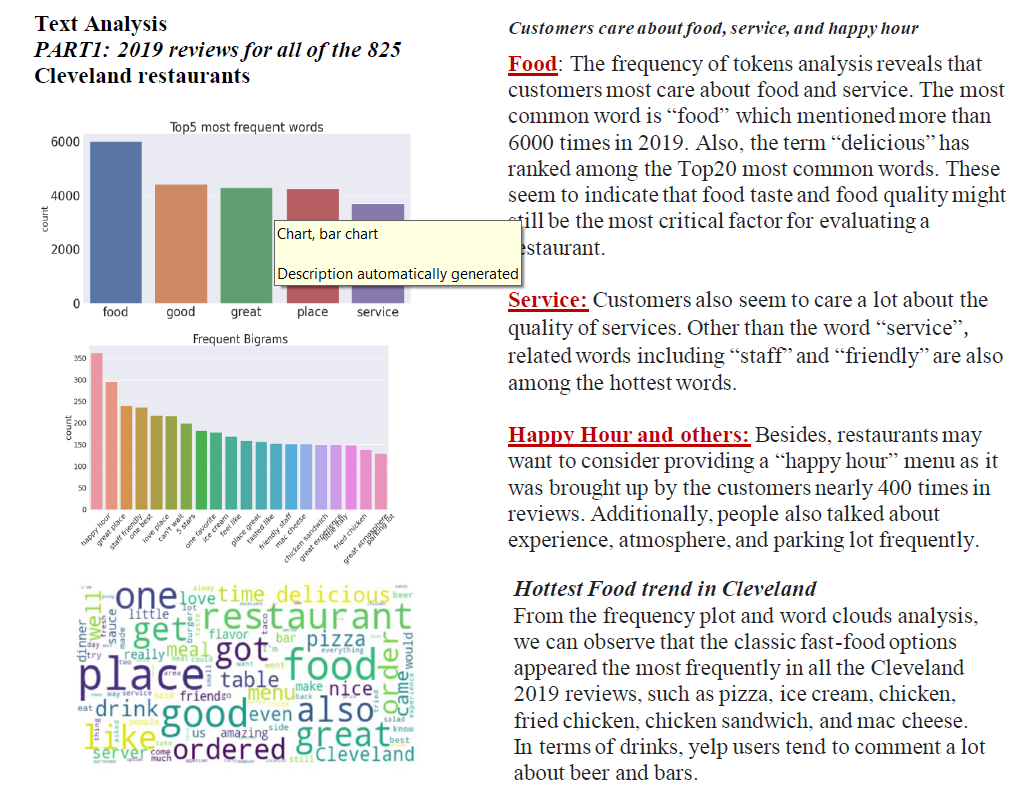

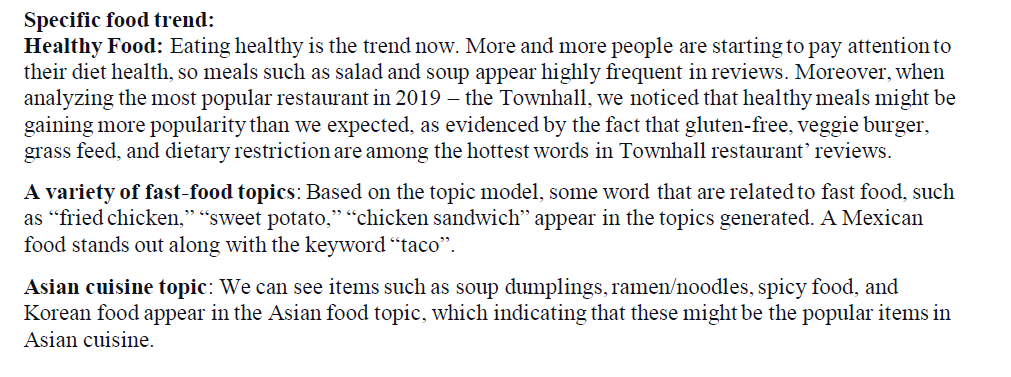

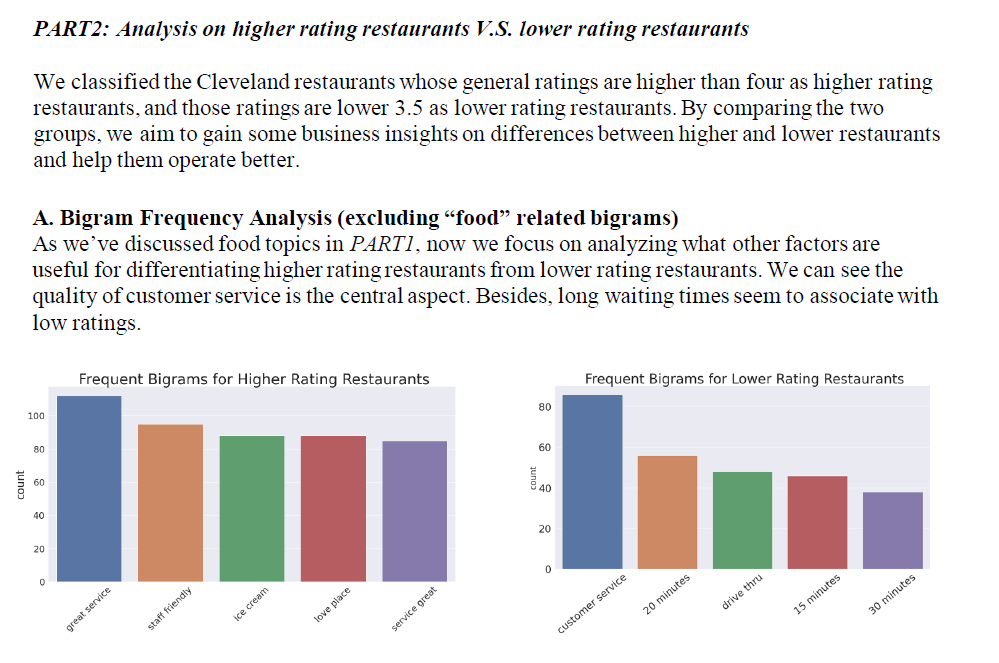

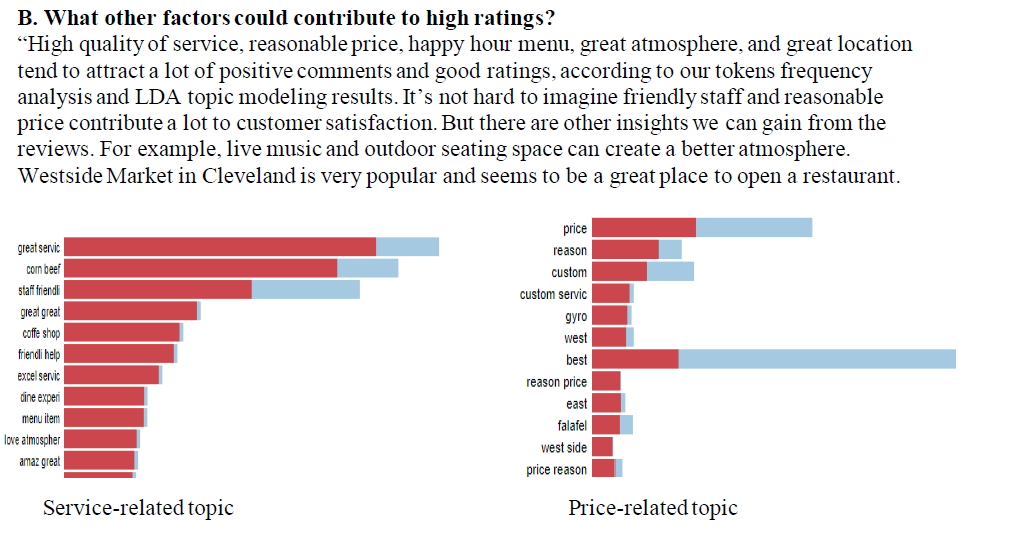

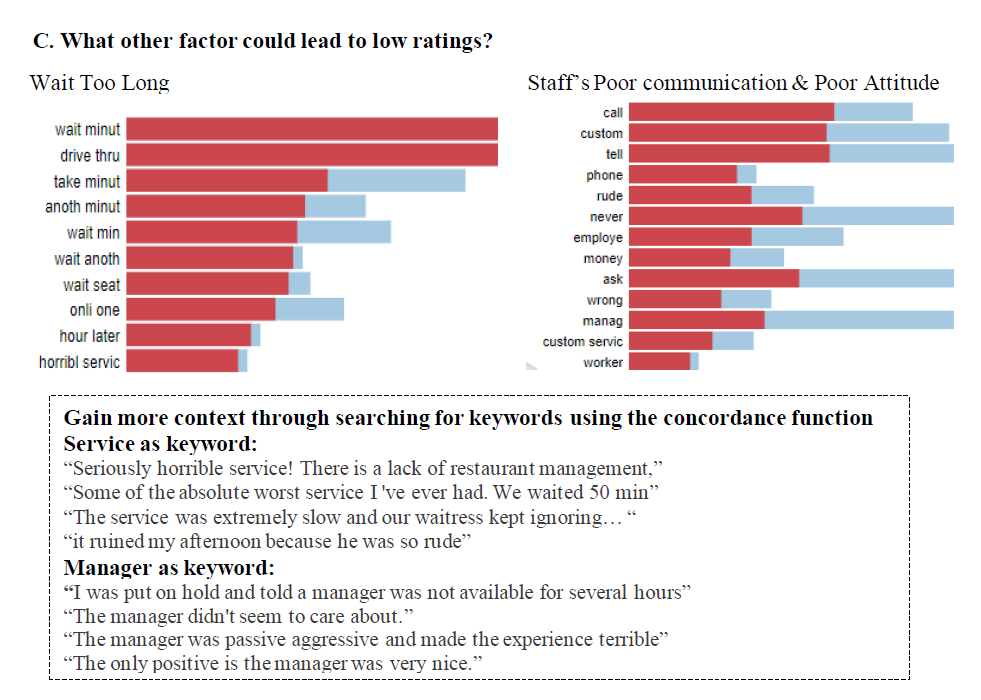

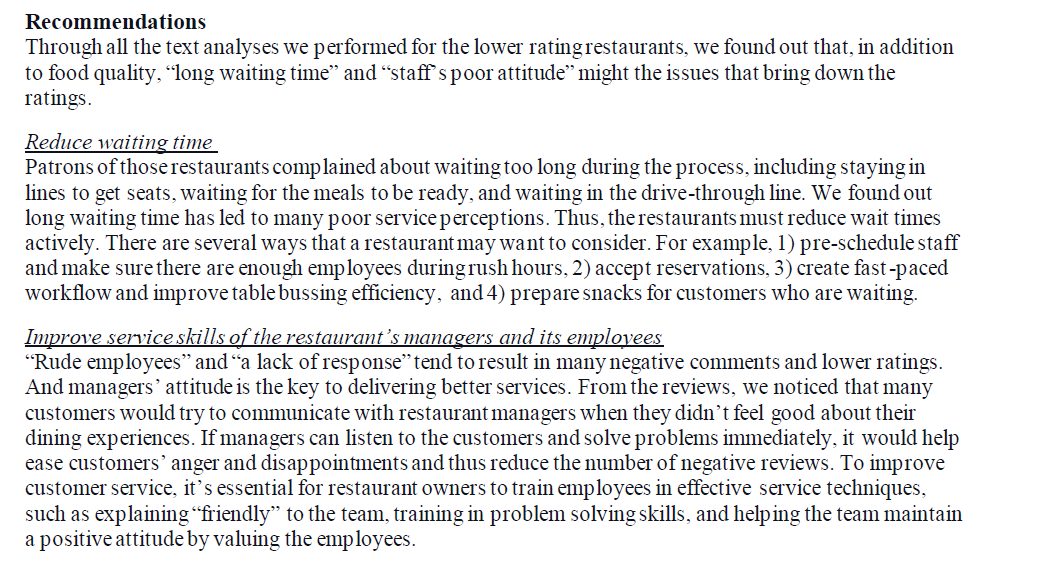